<a href="https://colab.research.google.com/github/StojanovicIvana/SpatialDatabasesProject/blob/main/VisualisationSpatial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 104.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 80.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 5.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime
from folium.plugins import MarkerCluster
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely import wkt
import geopandas as gpd
from sklearn.neighbors import BallTree

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# Importing the file
!unzip /content/drive/MyDrive/Spatial/ivana.zip

Archive:  /content/drive/MyDrive/Spatial/ivana.zip
  inflating: ivana.csv               


In [ ]:
visual=pd.read_csv("ivana.csv", header=0)
visual.shape

(4574138, 7)

In [ ]:
visual['Pickup Centroid Location'] = visual['Pickup Centroid Location'].apply(wkt.loads)

In [ ]:
# Changing datatypes
gdf = gpd.GeoDataFrame(visual, geometry='Pickup Centroid Location')
gdf['Trip Start Timestamp'] = pd.to_datetime(gdf['Trip Start Timestamp'])
gdf['Trip End Timestamp'] = pd.to_datetime(gdf['Trip End Timestamp'])

In [ ]:
gdf.dtypes

Unnamed: 0                           int64
Trip ID                             object
Taxi ID                             object
Trip Start Timestamp        datetime64[ns]
Trip End Timestamp          datetime64[ns]
Pickup Community Area              float64
Pickup Centroid Location          geometry
dtype: object

In [2]:
# Extracting the points
points = [[point.xy[1][0], point.xy[0][0]] for point in gdf.geometry]

# Creating the map
map = folium.Map(location=[41.79259, -87.76962], zoom_start=9)
map

# Saving the general heatmap
#HeatMap(points).add_to(map)
#map.save('map.html')

NameError: ignored

In [3]:
# Shapefile for community areas boundaries
comAreas=open("/content/drive/MyDrive/Spatial/Boundaries-CommunityAreas.geojson", "r", encoding="utf-8-sig").read()

HEAT MAP WITH TIME SLIDER

In [ ]:
# Data for one Friday in October
options = [4]
gdfTemp = gdf.loc[gdf['Trip Start Timestamp'].dt.weekday.isin(options)]
gdfHM = gdfTemp[(gdfTemp['Trip Start Timestamp'] >= '2022-10-28 00:00:00') & (gdfTemp['Trip Start Timestamp'] <= '2022-10-29 23:15:00')]

gdfHM

,Unnamed: 0,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Pickup Community Area,Pickup Centroid Location
4522445,5266476,18e5cceaf5ff41ee8db77aa614c6fdada9210332,624a6a680c34b514659e430a8c859b763e61c2cd9f0e2f...,2022-10-28 00:00:00,2022-10-28 00:30:00,76.0,POINT (-87.91362 41.98026)
4522446,5266477,4e9099aa4c53b2627197f5b2dae9b51eaa7f8a22,bee9782d8d7310bc1b902a8fe547baf0da4c95165bd81f...,2022-10-28 00:00:00,2022-10-28 00:00:00,56.0,POINT (-87.76962 41.79259)
4522447,5266478,57082962be515aa293c61e45a90c56a6eded8dc4,fdb16324f07e66dd7338161569ae6991f89e38884bac4a...,2022-10-28 00:00:00,2022-10-28 00:15:00,3.0,POINT (-87.65588 41.96581)
4522448,5266479,65b6ec0ed72abed029281ddc72bc67d6aad4447b,9b6ede7d36f53ba56a1ec8882cc17703224ac426ba9ef9...,2022-10-28 00:00:00,2022-10-28 00:15:00,8.0,POINT (-87.63331 41.89960)
4522449,5266480,6a4df51d4ebf55e8c2b24de78fad9cfdbee7d49b,8c302890305f37bb9d1732e606816c872a73b73f69a0ea...,2022-10-28 00:00:00,2022-10-28 00:15:00,8.0,POINT (-87.63331 41.89960)
...,...,...,...,...,...,...,...
4539192,5285575,f3479a2bfdef3546234a9f210da726d621027802,8c302890305f37bb9d1732e606816c872a73b73f69a0ea...,2022-10-28 23:45:00,2022-10-29 00:00:00,8.0,POINT (-87.63331 41.89960)
4539193,5285576,f386af97ed02fd9abd3a5bf9fdf93e1f82c654a9,80b33c6123e5192e254b219f429bd376d02aad87b9bc2e...,2022-10-28 23:45:00,2022-10-29 00:00:00,32.0,POINT (-87.63275 41.88099)
4539194,5285577,f5315e4a062a263fc57eac416041771b277c9965,65e6fa122a48ea7742344a508371345cb5be9827c3837d...,2022-10-28 23:45:00,2022-10-29 00:00:00,51.0,POINT (-87.57006 41.69063)
4539195,5285578,f976f32f9e03d4a90bb12d9cdad1fdfd55c530ee,f42c1db446b1252847c7fc550a732ffc6dd30cb59113f8...,2022-10-28 23:45:00,2022-10-29 00:00:00,76.0,POINT (-87.91362 41.98026)


In [ ]:
gdfHM['lon'] = gdfHM['Pickup Centroid Location'].x
gdfHM['lat'] = gdfHM['Pickup Centroid Location'].y
gdfHM

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,Unnamed: 0,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Pickup Community Area,Pickup Centroid Location,lon,lat
4522445,5266476,18e5cceaf5ff41ee8db77aa614c6fdada9210332,624a6a680c34b514659e430a8c859b763e61c2cd9f0e2f...,2022-10-28 00:00:00,2022-10-28 00:30:00,76.0,POINT (-87.91362 41.98026),-87.913625,41.980264
4522446,5266477,4e9099aa4c53b2627197f5b2dae9b51eaa7f8a22,bee9782d8d7310bc1b902a8fe547baf0da4c95165bd81f...,2022-10-28 00:00:00,2022-10-28 00:00:00,56.0,POINT (-87.76962 41.79259),-87.769615,41.792592
4522447,5266478,57082962be515aa293c61e45a90c56a6eded8dc4,fdb16324f07e66dd7338161569ae6991f89e38884bac4a...,2022-10-28 00:00:00,2022-10-28 00:15:00,3.0,POINT (-87.65588 41.96581),-87.655879,41.965812
4522448,5266479,65b6ec0ed72abed029281ddc72bc67d6aad4447b,9b6ede7d36f53ba56a1ec8882cc17703224ac426ba9ef9...,2022-10-28 00:00:00,2022-10-28 00:15:00,8.0,POINT (-87.63331 41.89960),-87.633308,41.899602
4522449,5266480,6a4df51d4ebf55e8c2b24de78fad9cfdbee7d49b,8c302890305f37bb9d1732e606816c872a73b73f69a0ea...,2022-10-28 00:00:00,2022-10-28 00:15:00,8.0,POINT (-87.63331 41.89960),-87.633308,41.899602
...,...,...,...,...,...,...,...,...,...
4539192,5285575,f3479a2bfdef3546234a9f210da726d621027802,8c302890305f37bb9d1732e606816c872a73b73f69a0ea...,2022-10-28 23:45:00,2022-10-29 00:00:00,8.0,POINT (-87.63331 41.89960),-87.633308,41.899602
4539193,5285576,f386af97ed02fd9abd3a5bf9fdf93e1f82c654a9,80b33c6123e5192e254b219f429bd376d02aad87b9bc2e...,2022-10-28 23:45:00,2022-10-29 00:00:00,32.0,POINT (-87.63275 41.88099),-87.632746,41.880994
4539194,5285577,f5315e4a062a263fc57eac416041771b277c9965,65e6fa122a48ea7742344a508371345cb5be9827c3837d...,2022-10-28 23:45:00,2022-10-29 00:00:00,51.0,POINT (-87.57006 41.69063),-87.570058,41.690633
4539195,5285578,f976f32f9e03d4a90bb12d9cdad1fdfd55c530ee,f42c1db446b1252847c7fc550a732ffc6dd30cb59113f8...,2022-10-28 23:45:00,2022-10-29 00:00:00,76.0,POINT (-87.91362 41.98026),-87.913625,41.980264


In [ ]:
gdfHeatMap=gdfHM[['Trip Start Timestamp','lon','lat','Trip ID']]
gdfHeatMap

,Trip Start Timestamp,lon,lat,Trip ID
4522445,2022-10-28 00:00:00,-87.913625,41.980264,18e5cceaf5ff41ee8db77aa614c6fdada9210332
4522446,2022-10-28 00:00:00,-87.769615,41.792592,4e9099aa4c53b2627197f5b2dae9b51eaa7f8a22
4522447,2022-10-28 00:00:00,-87.655879,41.965812,57082962be515aa293c61e45a90c56a6eded8dc4
4522448,2022-10-28 00:00:00,-87.633308,41.899602,65b6ec0ed72abed029281ddc72bc67d6aad4447b
4522449,2022-10-28 00:00:00,-87.633308,41.899602,6a4df51d4ebf55e8c2b24de78fad9cfdbee7d49b
...,...,...,...,...
4539192,2022-10-28 23:45:00,-87.633308,41.899602,f3479a2bfdef3546234a9f210da726d621027802
4539193,2022-10-28 23:45:00,-87.632746,41.880994,f386af97ed02fd9abd3a5bf9fdf93e1f82c654a9
4539194,2022-10-28 23:45:00,-87.570058,41.690633,f5315e4a062a263fc57eac416041771b277c9965
4539195,2022-10-28 23:45:00,-87.913625,41.980264,f976f32f9e03d4a90bb12d9cdad1fdfd55c530ee


In [ ]:
gdfHeatMap['hour']=gdfHeatMap['Trip Start Timestamp'].apply(lambda x: x.hour+1)

In [ ]:
lat_long_list = []
for i in range(1, 25):
    temp=[]
    for index, instance in gdfHeatMap[gdfHeatMap['hour'] == i].iterrows():
        temp.append([instance['lat'],instance['lon']])
    lat_long_list.append(temp)

In [ ]:
# HeatMap with time slider for this weekend
heatMap = folium.Map(location=[41.79259, -87.76962], zoom_start=11)
HeatMapWithTime(lat_long_list,radius=15,auto_play=True,position='bottomright').add_to(heatMap)
heatMap

# Saving the map
heatMap.save('heatMapSlider.html')

### CLUSTERING 2.0
-used in project

In [ ]:
gdf['lon'] = gdf['Pickup Centroid Location'].x
gdf['lat'] = gdf['Pickup Centroid Location'].y
X = gdf.groupby(['lon', 'lat']).count().reset_index() 
X

,lon,lat,Unnamed: 0,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Pickup Community Area,Pickup Centroid Location
0,-87.913625,41.980264,267298,267298,267298,267298,267298,267298,267298
1,-87.903040,41.979071,376182,376182,376182,376182,376182,376182,376182
2,-87.901886,42.005560,10,10,10,10,10,10,10
3,-87.877305,41.982775,1865,1865,1865,1865,1865,0,1865
4,-87.844359,41.975338,81,81,81,81,81,81,81
...,...,...,...,...,...,...,...,...,...
578,-87.540936,41.663671,2706,2706,2706,2706,2706,2706,2706
579,-87.539916,41.713655,4,4,4,4,4,4,4
580,-87.535285,41.665168,4,4,4,4,4,4,4
581,-87.534903,41.707311,2542,2542,2542,2542,2542,2542,2542


In [ ]:
# Creates new columns converting coordinate degrees to radians.
for column in X[["lat", "lon"]]:
    rad = np.deg2rad(X[column].values)
    X[f'{column}_rad'] = rad

In [ ]:
tree = BallTree(X[['lat_rad','lon_rad']], metric='haversine')
distances, indices = tree.query(X[["lat_rad", "lon_rad"]].values, k =20)
distances=distances*6371.0  #to km
#distances[0]

In [ ]:
distances = np.sort(distances, axis=0)

distances_2 = distances[:,1]
distances_5 = distances[:,4]
distances_10 = distances[:,9]
distances_15= distances[:,14]

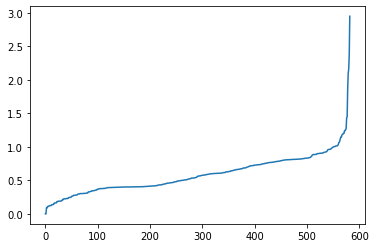

In [ ]:
plt.plot(distances_2)

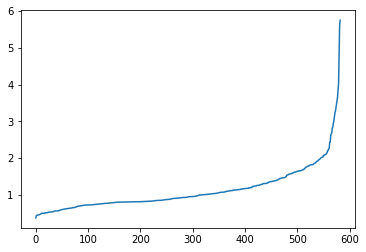

In [ ]:
plt.plot(distances_5)

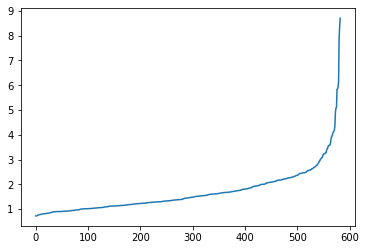

In [ ]:
plt.plot(distances_10)

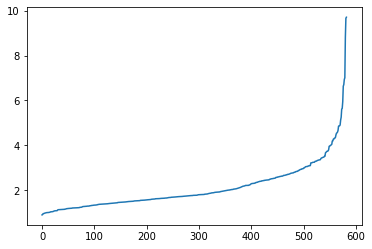

In [ ]:
plt.plot(distances_15)

In [ ]:
data_2 = np.vstack(( [i for i in range(len(distances))],distances_2))
data_5 = np.vstack(( [i for i in range(len(distances))],distances_5))
data_10 = np.vstack(( [i for i in range(len(distances))],distances_10))
data_15 = np.vstack(( [i for i in range(len(distances))],distances_15))

data_2=data_2.T
data_5=data_5.T
data_10=data_10.T
data_15=data_15.T

In [ ]:
!pip install kneebow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


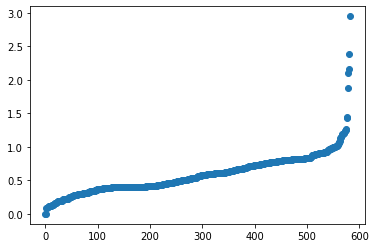

In [ ]:
plt.scatter(data_2[:, 0], data_2[:, 1]) #checking

In [ ]:
from kneebow.rotor import Rotor

In [ ]:
rotor = Rotor()
rotor.fit_rotate(data_2)
elbow_index_2 = rotor.get_elbow_index()

In [ ]:
rotor = Rotor()
rotor.fit_rotate(data_5)
elbow_index_5 = rotor.get_elbow_index()

In [ ]:
rotor = Rotor()
rotor.fit_rotate(data_10)
elbow_index_10 = rotor.get_elbow_index()

In [ ]:
rotor = Rotor()
rotor.fit_rotate(data_15)
elbow_index_15 = rotor.get_elbow_index()

In [ ]:
parametar_2=data_2[elbow_index_2][1] #in km, use as a parameter
parametar_5=data_5[elbow_index_5][1]
parametar_10=data_10[elbow_index_10][1]
parametar_15=data_15[elbow_index_15][1]

In [ ]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

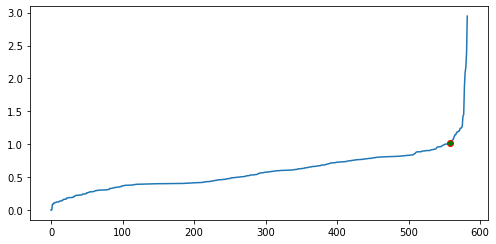

In [ ]:
plt.plot(distances_2)
x = [elbow_index_2]
y = [data_2[elbow_index_2][1]]

plt.plot(x, y, marker="o", markersize=6, markeredgecolor="red", markerfacecolor="green")

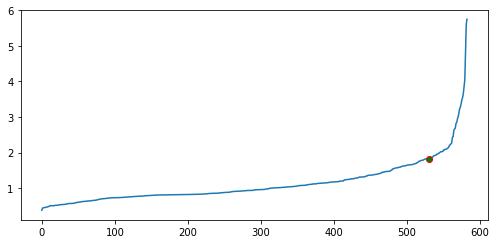

In [ ]:
plt.plot(distances_5)
x = [elbow_index_5]
y = [data_5[elbow_index_5][1]]

plt.plot(x, y, marker="o", markersize=6, markeredgecolor="red", markerfacecolor="green")

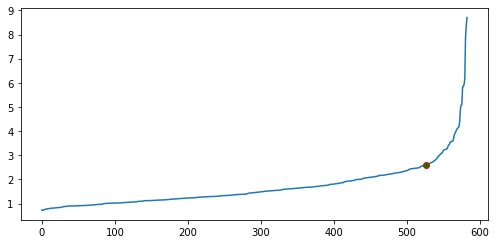

In [ ]:
plt.plot(distances_10)
x = [elbow_index_10]
y = [data_10[elbow_index_10][1]]

plt.plot(x, y, marker="o", markersize=6, markeredgecolor="red", markerfacecolor="green")

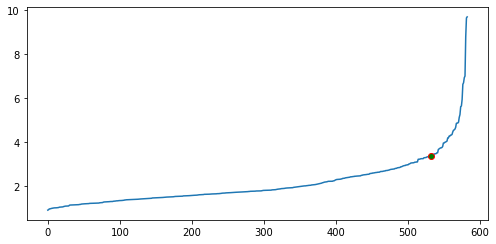

In [ ]:
plt.plot(distances_15)
x = [elbow_index_15]
y = [data_15[elbow_index_15][1]]

plt.plot(x, y, marker="o", markersize=6, markeredgecolor="red", markerfacecolor="green")

In [ ]:
# DBSCAN algorithm
from sklearn.cluster import DBSCAN

def dbscan_cluster(latitudes,longitudes,epsilon,min_samples,**kwargs):    
    # convert epsilon from km to radians 
    kms_per_radian = 6371.0088
    epsilon /= kms_per_radian    
    # set up the algorithm ?šta uzeti za parametre? -- odgovor dole
    dbscan = DBSCAN(
        eps = epsilon,
        min_samples = min_samples,
        algorithm = 'ball_tree',
        metric = 'haversine',
        **kwargs
    )
    # fit the algorithm
    dbscan.fit(
        np.radians(
            [x for x in zip(latitudes,longitudes)]   #zip(gdfCluster['lat'], gdfCluster['lon'])
        )
    )    
    # return the cluster labels
    return pd.Series(dbscan.labels_)

Cluster minPts = 2

In [ ]:
#min point 2
klasteri_2=dbscan_cluster(X['lat'], X['lon'], parametar_2, 2)
X = X.assign(cluster_2=klasteri_2.values)

In [ ]:
X['Pickup Centroid Location'].groupby(X['cluster_2']).count()

cluster_2
-1      25
 0       2
 1       2
 2       2
 3       2
 4       4
 5       3
 6       2
 7       4
 8      14
 9     423
 10      2
 11      2
 12      2
 13      4
 14      2
 15      2
 16      3
 17      9
 18      2
 19      6
 20      2
 21      2
 22      2
 23      3
 24      4
 25      2
 26      2
 27      5
 28      3
 29      3
 30      2
 31      2
 32      8
 33      7
 34      2
 35      2
 36      3
 37      3
 38      2
 39      3
 40      2
 41      2
Name: Pickup Centroid Location, dtype: int64

In [ ]:
# Map for klaster2
# Overlayed community areas
klaster2 = folium.Map(location=[41.79259, -87.76962], zoom_start=11)

clustersLayer = folium.FeatureGroup(name= '<u><b>clusters</b></u>',show= True)
klaster2.add_child(clustersLayer)
minus1cluster = folium.FeatureGroup(name= '<u><b>unclustered</b></u>',show= False)
klaster2.add_child(minus1cluster)
comAreasLayer = folium.GeoJson(
    comAreas,
    name="CommunityAreas")
klaster2.add_child(comAreasLayer)

for u, v, c in zip(X['lat'], X['lon'], X['cluster_2']):
  if c == 0:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='red', icon='location-dot', prefix='fa'),
        popup = "Cluster 0").add_to(clustersLayer)
  elif c == 1:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='orange', icon='location-dot', prefix='fa'),
        popup = "Cluster 1").add_to(clustersLayer)
  elif c == 2:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='green', icon='location-dot', prefix='fa'),
        popup = "Cluster 2").add_to(clustersLayer)
  elif c == 3:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='purple', icon='location-dot', prefix='fa'),
        popup = "Cluster 3").add_to(clustersLayer)
  elif c == 4:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='cadetblue', icon='location-dot', prefix='fa'),
        popup = "Cluster 4").add_to(clustersLayer)
  elif c == 5:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='pink', icon='location-dot', prefix='fa'),
        popup = "Cluster 5").add_to(clustersLayer)
  elif c == 6:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='blue', icon='location-dot', prefix='fa'),
        popup = "Cluster 6").add_to(clustersLayer)
  elif c == 7:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='gray', icon='location-dot', prefix='fa'),
        popup = "Cluster 7").add_to(clustersLayer)
  elif c == 8:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='darkred', icon='location-dot', prefix='fa'),
        popup = "Cluster 8").add_to(clustersLayer)
  elif c == 9:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='lightred', icon='location-dot', prefix='fa'),
        popup = "Cluster 9").add_to(clustersLayer)
  elif c == 10:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='beige', icon='location-dot', prefix='fa'),
        popup = "Cluster 10").add_to(clustersLayer)
  elif c == 11:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='darkgreen', icon='location-dot', prefix='fa'),
        popup = "Cluster 11").add_to(clustersLayer)
  elif c == 12:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='lightgreen', icon='location-dot', prefix='fa'),
        popup = "Cluster 12").add_to(clustersLayer)
  elif c == 13:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='darkblue', icon='location-dot', prefix='fa'),
        popup = "Cluster 13").add_to(clustersLayer)
  elif c == 14:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='lightblue', icon='location-dot', prefix='fa'),
        popup = "Cluster 14").add_to(clustersLayer)
  elif c == 15:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='darkpurple', icon='location-dot', prefix='fa'),
        popup = "Cluster 15").add_to(clustersLayer)
  elif c == 16:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='lightgray', icon='location-dot', prefix='fa'),
        popup = "Cluster 16").add_to(clustersLayer)
  elif c == 17:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='black', icon='location-dot', prefix='fa'),
        popup = "Cluster 17").add_to(clustersLayer)
  elif c == 18:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='red', icon='circle', icon_color="white", prefix='fa'),
        popup = "Cluster 18").add_to(clustersLayer)
  elif c == 19:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='darkred', icon='circle', icon_color="white", prefix='fa'),
        popup = "Cluster 19").add_to(clustersLayer)
  elif c == 20:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='gray', icon='circle', icon_color="white", prefix='fa'),
        popup = "Cluster 20").add_to(clustersLayer)
  elif c == 21:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='lightred', icon='circle', icon_color="white", prefix='fa'),
        popup = "Cluster 21").add_to(clustersLayer)
  elif c == 22:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='orange', icon='circle', icon_color="white", prefix='fa'),
        popup = "Cluster 22").add_to(clustersLayer)
  elif c == 23:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='beige', icon='circle', icon_color="white", prefix='fa'),
        popup = "Cluster 23").add_to(clustersLayer)
  elif c == 24:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='green', icon='circle', icon_color="white", prefix='fa'),
        popup = "Cluster 24").add_to(clustersLayer)
  elif c == 25:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='lightgreen', icon='circle', icon_color="white", prefix='fa'),
        popup = "Cluster 25").add_to(clustersLayer)
  elif c == 26:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='darkgreen', icon='circle', icon_color="white", prefix='fa'),
        popup = "Cluster 26").add_to(clustersLayer)
  elif c == 27:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='darkblue', icon='circle', icon_color="white", prefix='fa'),
        popup = "Cluster 27").add_to(clustersLayer)
  elif c == 28:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='lightblue', icon='circle', icon_color="white", prefix='fa'),
        popup = "Cluster 28").add_to(clustersLayer)
  elif c == 29:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='purple', icon='circle', icon_color="white", prefix='fa'),
        popup = "Cluster 29").add_to(clustersLayer)
  elif c == 30:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='darkpurple', icon='circle', icon_color="white", prefix='fa'),
        popup = "Cluster 30").add_to(clustersLayer)
  elif c == 31:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='pink', icon='circle', icon_color="white", prefix='fa'),
        popup = "Cluster 31").add_to(clustersLayer)
  elif c == 32:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='cadetblue', icon='circle', icon_color="white", prefix='fa'),
        popup = "Cluster 32").add_to(clustersLayer)
  elif c == 33:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='black', icon='circle', icon_color="white", prefix='fa'),
        popup = "Cluster 33").add_to(clustersLayer)
  elif c == 34:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='lightgray', icon='circle', icon_color="white", prefix='fa'),
        popup = "Cluster 34").add_to(clustersLayer)
  elif c == 35:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='red', icon='circle-o', icon_color="white", prefix='fa'),
        popup = "Cluster 35").add_to(clustersLayer)
  elif c == 36:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='darkred', icon='circle-o', icon_color="white", prefix='fa'),
        popup = "Cluster 36").add_to(clustersLayer)
  elif c == 37:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='gray', icon='circle-o', icon_color="white", prefix='fa'),
        popup = "Cluster 37").add_to(clustersLayer)
  elif c == 38:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='lightred', icon='circle-o', icon_color="white", prefix='fa'),
        popup = "Cluster 38").add_to(clustersLayer)
  elif c == 39:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='orange', icon='circle-o', icon_color="white", prefix='fa'),
        popup = "Cluster 39").add_to(clustersLayer)
  elif c == 40:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='beige', icon='circle-o', icon_color="white", prefix='fa'),
        popup = "Cluster 40").add_to(clustersLayer)
  elif c == 41:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='green', icon='circle-o', icon_color="white", prefix='fa'),
        popup = "Cluster 41").add_to(clustersLayer)
  else:
    folium.Marker(
        location=[u, v]).add_to(minus1cluster)

folium.LayerControl(collapsed=True ,position= 'topright').add_to(klaster2)

# Saving the map
#klaster2.save('klaster2Map.html')

Cluster minPts = 5

In [ ]:
#min point 5
klasteri_5=dbscan_cluster(X['lat'], X['lon'], parametar_5, 5)
X= X.assign(cluster_5=klasteri_5.values)

In [ ]:
X['Pickup Centroid Location'].groupby(X['cluster_5']).count()

cluster_5
-1     21
 0      8
 1    532
 2     14
 3      8
Name: Pickup Centroid Location, dtype: int64

In [ ]:
# Map for klaster5
# Overlayed community areas
klaster5 = folium.Map(location=[41.79259, -87.76962], zoom_start=11)

clustersLayer = folium.FeatureGroup(name= '<u><b>clusters</b></u>',show= True)
klaster5.add_child(clustersLayer)
minus1cluster = folium.FeatureGroup(name= '<u><b>unclustered</b></u>',show= False)
klaster5.add_child(minus1cluster)
comAreasLayer = folium.GeoJson(
    comAreas,
    name="CommunityAreas")
klaster5.add_child(comAreasLayer)

for u, v, c in zip(X['lat'], X['lon'], X['cluster_5']):
  if c == 0:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='red', icon='location-dot', prefix='fa'),
        popup = "Cluster 0").add_to(clustersLayer)
  elif c == 1:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='orange', icon='location-dot', prefix='fa'),
        popup = "Cluster 1").add_to(clustersLayer)
  elif c == 2:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='green', icon='location-dot', prefix='fa'),
        popup = "Cluster 2").add_to(clustersLayer)
  elif c == 3:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='purple', icon='location-dot', prefix='fa'),
        popup = "Cluster 3").add_to(clustersLayer)
  else:
    folium.Marker(
        location=[u, v]).add_to(minus1cluster)

folium.LayerControl(collapsed=True ,position= 'topright').add_to(klaster5)

# Saving the map
#klaster5.save('klaster5Map.html')

Cluster minPts = 10

In [ ]:
#min point 10
klasteri_10=dbscan_cluster(X['lat'], X['lon'], parametar_10, 10)
X= X.assign(cluster_10=klasteri_10.values)

In [ ]:
X['Pickup Centroid Location'].groupby(X['cluster_10']).count()

cluster_10
-1     19
 0    564
Name: Pickup Centroid Location, dtype: int64

In [ ]:
# Map for klaster10
# Overlayed community areas
klaster10 = folium.Map(location=[41.79259, -87.76962], zoom_start=11)

clustersLayer = folium.FeatureGroup(name= '<u><b>clusters</b></u>',show= True)
klaster10.add_child(clustersLayer)
minus1cluster = folium.FeatureGroup(name= '<u><b>unclustered</b></u>',show= False)
klaster10.add_child(minus1cluster)
comAreasLayer = folium.GeoJson(
    comAreas,
    name="CommunityAreas")
klaster10.add_child(comAreasLayer)

for u, v, c in zip(X['lat'], X['lon'], X['cluster_10']):
  if c == 0:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='red', icon='location-dot', prefix='fa'),
        popup = "Cluster 0").add_to(clustersLayer)  
  else:
    folium.Marker(
        location=[u, v]).add_to(minus1cluster)

folium.LayerControl(collapsed=True ,position= 'topright').add_to(klaster10)

# Saving the map
#klaster10.save('klaster10Map.html')

In [ ]:
#min point 15
klasteri_15=dbscan_cluster(X['lat'], X['lon'], parametar_15, 15)
X= X.assign(cluster_15=klasteri_15.values)

Cluster minPts = 15

In [ ]:
X['Pickup Centroid Location'].groupby(X['cluster_15']).count()

cluster_15
-1     12
 0    571
Name: Pickup Centroid Location, dtype: int64

In [ ]:
# Map for klaster15
# Overlayed community areas
klaster15 = folium.Map(location=[41.79259, -87.76962], zoom_start=11)

clustersLayer = folium.FeatureGroup(name= '<u><b>clusters</b></u>',show= True)
klaster15.add_child(clustersLayer)
minus1cluster = folium.FeatureGroup(name= '<u><b>unclustered</b></u>',show= False)
klaster15.add_child(minus1cluster)
comAreasLayer = folium.GeoJson(
    comAreas,
    name="CommunityAreas")
klaster15.add_child(comAreasLayer)

for u, v, c in zip(X['lat'], X['lon'], X['cluster_15']):
  if c == 0:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='green', icon='location-dot', prefix='fa'),
        popup = "Cluster 0").add_to(clustersLayer)  
  else:
    folium.Marker(
        location=[u, v]).add_to(minus1cluster)

folium.LayerControl(collapsed=True ,position= 'topright').add_to(klaster15)

# Saving the map
#klaster15.save('klaster15Map.html')

## Clustering 1.0

In [ ]:
# Data for just one weekend
options = [4, 5]
gdfTemp = gdf.loc[gdf['Trip Start Timestamp'].dt.weekday.isin(options)]
gdfCluster = gdfTemp[(gdfTemp['Trip Start Timestamp'] >= '2022-10-28 21:00:00') & (gdfTemp['Trip Start Timestamp'] <= '2022-10-29 04:00:00')]

gdfCluster

,Unnamed: 0,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Pickup Community Area,Pickup Centroid Location,lon,lat
4537635,5283765,1986cc5c706b4a27365e2bf545420b35f0342499,1bb875f74db6b3d8bcab27f6784218036ec738c201e533...,2022-10-28 21:00:00,2022-10-28 21:30:00,6.0,POINT (-87.65600 41.94423),-87.655998,41.944227
4537636,5283767,6ede9e3834aa0049da44c0e2b7e62b1e0b1cc4ac,237a0889e04b6ab9609738d8b35485bce00cf600493d4e...,2022-10-28 21:00:00,2022-10-28 21:15:00,8.0,POINT (-87.63186 41.89204),-87.631864,41.892042
4537637,5283768,70702c9e84c942c2f1c725a63f69681b80277549,8f3c7d4cc11fd46561981647499508fd69142984514478...,2022-10-28 21:00:00,2022-10-28 21:00:00,8.0,POINT (-87.63331 41.89960),-87.633308,41.899602
4537638,5283769,7a485c1594e493c9e8912a89a844506f4280229b,ea67cf50724b1bb2aefc695753c9640903e27d2ea46cd8...,2022-10-28 21:00:00,2022-10-28 21:30:00,61.0,POINT (-87.65917 41.80902),-87.659167,41.809018
4537639,5283770,95d8a0f647bbaafd363a4e10edf1750e316f6167,8b8d35663133904892cc1e87911f55ed0bdf9a9bd1093c...,2022-10-28 21:00:00,2022-10-28 21:15:00,8.0,POINT (-87.63331 41.89960),-87.633308,41.899602
...,...,...,...,...,...,...,...,...,...
4540612,5287141,da2b0c4a29a90514e6d3c2b075ff1d1654803743,8942c504d38b52d769ac1800e8c7dde070687626dcae14...,2022-10-29 04:00:00,2022-10-29 04:15:00,8.0,POINT (-87.63331 41.89960),-87.633308,41.899602
4540613,5287142,d9b4cfc23567fcc5faada095076fcb774d390d01,c53face33b74e90c719c30c33f394050ca1e93ca6b11a8...,2022-10-29 04:00:00,2022-10-29 04:00:00,7.0,POINT (-87.64949 41.92269),-87.649489,41.922686
4540614,5287143,f3f9c927094fd60884cb46faca49f9682c6c8b96,10e8a565ac8829bd9caa44f57e9831fd8b4ff374e4d666...,2022-10-29 04:00:00,2022-10-29 04:00:00,5.0,POINT (-87.68383 41.94779),-87.683835,41.947792
4540615,5287144,f3f695df2864f1511ddfc247f3b86216bc9c0f32,3ff6ae822a41ebadfdbdecf4bfe5cd766bc1c22f885fff...,2022-10-29 04:00:00,2022-10-29 04:15:00,60.0,POINT (-87.64879 41.83615),-87.648788,41.836150


In [ ]:
gdfCluster['lon'] = gdfCluster['Pickup Centroid Location'].x
gdfCluster['lat'] = gdfCluster['Pickup Centroid Location'].y
gdfCluster

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,Unnamed: 0,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Pickup Community Area,Pickup Centroid Location,lon,lat
4537635,5283765,1986cc5c706b4a27365e2bf545420b35f0342499,1bb875f74db6b3d8bcab27f6784218036ec738c201e533...,2022-10-28 21:00:00,2022-10-28 21:30:00,6.0,POINT (-87.65600 41.94423),-87.655998,41.944227
4537636,5283767,6ede9e3834aa0049da44c0e2b7e62b1e0b1cc4ac,237a0889e04b6ab9609738d8b35485bce00cf600493d4e...,2022-10-28 21:00:00,2022-10-28 21:15:00,8.0,POINT (-87.63186 41.89204),-87.631864,41.892042
4537637,5283768,70702c9e84c942c2f1c725a63f69681b80277549,8f3c7d4cc11fd46561981647499508fd69142984514478...,2022-10-28 21:00:00,2022-10-28 21:00:00,8.0,POINT (-87.63331 41.89960),-87.633308,41.899602
4537638,5283769,7a485c1594e493c9e8912a89a844506f4280229b,ea67cf50724b1bb2aefc695753c9640903e27d2ea46cd8...,2022-10-28 21:00:00,2022-10-28 21:30:00,61.0,POINT (-87.65917 41.80902),-87.659167,41.809018
4537639,5283770,95d8a0f647bbaafd363a4e10edf1750e316f6167,8b8d35663133904892cc1e87911f55ed0bdf9a9bd1093c...,2022-10-28 21:00:00,2022-10-28 21:15:00,8.0,POINT (-87.63331 41.89960),-87.633308,41.899602
...,...,...,...,...,...,...,...,...,...
4540612,5287141,da2b0c4a29a90514e6d3c2b075ff1d1654803743,8942c504d38b52d769ac1800e8c7dde070687626dcae14...,2022-10-29 04:00:00,2022-10-29 04:15:00,8.0,POINT (-87.63331 41.89960),-87.633308,41.899602
4540613,5287142,d9b4cfc23567fcc5faada095076fcb774d390d01,c53face33b74e90c719c30c33f394050ca1e93ca6b11a8...,2022-10-29 04:00:00,2022-10-29 04:00:00,7.0,POINT (-87.64949 41.92269),-87.649489,41.922686
4540614,5287143,f3f9c927094fd60884cb46faca49f9682c6c8b96,10e8a565ac8829bd9caa44f57e9831fd8b4ff374e4d666...,2022-10-29 04:00:00,2022-10-29 04:00:00,5.0,POINT (-87.68383 41.94779),-87.683835,41.947792
4540615,5287144,f3f695df2864f1511ddfc247f3b86216bc9c0f32,3ff6ae822a41ebadfdbdecf4bfe5cd766bc1c22f885fff...,2022-10-29 04:00:00,2022-10-29 04:15:00,60.0,POINT (-87.64879 41.83615),-87.648788,41.836150


In [ ]:
gdfCluster= gdfCluster.groupby(['lon', 'lat']).count().reset_index() 
gdfCluster

,lon,lat,Unnamed: 0,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Pickup Community Area,Pickup Centroid Location
0,-87.913625,41.980264,193,193,193,193,193,193,193
1,-87.903040,41.979071,107,107,107,107,107,107,107
2,-87.804532,41.985015,9,9,9,9,9,9,9
3,-87.771167,41.978830,4,4,4,4,4,4,4
4,-87.769615,41.792592,70,70,70,70,70,70,70
...,...,...,...,...,...,...,...,...,...
95,-87.572782,41.761578,4,4,4,4,4,4,4
96,-87.572717,41.729676,1,1,1,1,1,1,1
97,-87.570058,41.690633,4,4,4,4,4,4,4
98,-87.551428,41.741243,2,2,2,2,2,2,2


In [ ]:
# Creates new columns converting coordinate degrees to radians.
for column in gdfCluster[["lat", "lon"]]:
    rad = np.deg2rad(gdfCluster[column].values)
    gdfCluster[f'{column}_rad'] = rad

In [ ]:
tree = BallTree(gdfCluster[['lat_rad','lon_rad']], metric='haversine')
distances, indices = tree.query(gdfCluster[["lat_rad", "lon_rad"]].values, k =20)
distances=distances*6371.0  #to km
#distances[0]

In [ ]:
distances = np.sort(distances, axis=0)

distances_2 = distances[:,1]

In [ ]:
data_2 = np.vstack(( [i for i in range(len(distances))],distances_2))
data_2=data_2.T

In [ ]:
rotor = Rotor()
rotor.fit_rotate(data_2)
elbow_index_2 = rotor.get_elbow_index()

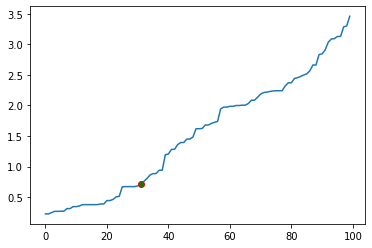

In [ ]:
plt.plot(distances_2)
x = [elbow_index_2]
y = [data_2[elbow_index_2][1]]

plt.plot(x, y, marker="o", markersize=6, markeredgecolor="red", markerfacecolor="green")

In [ ]:
parametar_2=data_2[elbow_index_2][1] #to km, use as parameter
parametar_2

0.7098225266873088

In [4]:
# DBSCAN alg
from sklearn.cluster import DBSCAN

def dbscan_cluster(latitudes,longitudes,epsilon,min_samples,**kwargs):    
    # convert epsilon from km to radians 
    kms_per_radian = 6371.0088
    epsilon /= kms_per_radian    
    # set up the algorithm ?šta uzeti za parametre? -- odgovor dole
    dbscan = DBSCAN(
        eps = epsilon,
        min_samples = min_samples,
        algorithm = 'ball_tree',
        metric = 'haversine',
        **kwargs
    )
    # fit the algorithm
    dbscan.fit(
        np.radians(
            [x for x in zip(latitudes,longitudes)]   #zip(gdfCluster['lat'], gdfCluster['lon'])
        )
    )    
    # return the cluster labels
    return pd.Series(dbscan.labels_)

In [ ]:
# Clustering with "big" gdf
klasteri=dbscan_cluster(gdfCluster['lat'], gdfCluster['lon'], 2.5, 2)
gdfCluster= gdfCluster.assign(cluster=klasteri.values)

In [ ]:
gdfCluster['Pickup Centroid Location'].groupby(gdfCluster['cluster']).count()

cluster
-1    15
 0     2
 1     2
 2     6
 3    62
 4     3
 5     2
 6     3
 7     5
Name: Pickup Centroid Location, dtype: int64

In [ ]:
# Map (for 2.5)
# Overlayed community areas
weekend2 = folium.Map(location=[41.79259, -87.76962], zoom_start=11)

clustersLayer = folium.FeatureGroup(name= '<u><b>clusters</b></u>',show= True)
weekend2.add_child(clustersLayer)
minus1cluster = folium.FeatureGroup(name= '<u><b>unclustered</b></u>',show= False)
weekend2.add_child(minus1cluster)
comAreasLayer = folium.GeoJson(
    comAreas,
    name="CommunityAreas")
weekend2.add_child(comAreasLayer)

for u, v, c in zip(gdfCluster['lat'], gdfCluster['lon'], gdfCluster['cluster']):
  if c == 0:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='red', icon='location-dot', prefix='fa'),
        popup = "Cluster 0").add_to(clustersLayer)
  elif c == 1:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='orange', icon='location-dot', prefix='fa'),
        popup = "Cluster 1").add_to(clustersLayer)
  elif c == 2:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='green', icon='location-dot', prefix='fa'),
        popup = "Cluster 2").add_to(clustersLayer)
  elif c == 3:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='purple', icon='location-dot', prefix='fa'),
        popup = "Cluster 3").add_to(clustersLayer)
  elif c == 4:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='cadetblue', icon='location-dot', prefix='fa'),
        popup = "Cluster 4").add_to(clustersLayer)
  elif c == 5:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='pink', icon='location-dot', prefix='fa'),
        popup = "Cluster 5").add_to(clustersLayer)
  elif c == 6:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='darkred', icon='location-dot', prefix='fa'),
        popup = "Cluster 6").add_to(clustersLayer)
  elif c == 7:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='black', icon='location-dot', prefix='fa'),
        popup = "Cluster 7").add_to(clustersLayer)
  else:
    folium.Marker(
        location=[u, v]).add_to(minus1cluster)

folium.LayerControl(collapsed=True ,position= 'topright').add_to(weekend2)

# Saving the map
#weekend2.save('oneWeekend2ipo.html')

In [ ]:
#Other cluster map
clusterMap = folium.Map(location=[41.79259, -87.76962], zoom_start=9)
mCluster = MarkerCluster(name="Cluster").add_to(clusterMap)
for u, v in zip(gdfCluster['lat'], gdfCluster['lon']):
    folium.Marker(location=[u, v]).add_to(mCluster)

clusterMap

# Saving the map
#clusterMap.save('clusterMapOneWeekend.html')

'\nclusterMap = folium.Map(location=[41.79259, -87.76962], zoom_start=9)\nmCluster = MarkerCluster(name="Cluster").add_to(clusterMap)\nfor u, v in zip(gdfCluster[\'lat\'], gdfCluster[\'lon\']):\n    folium.Marker(location=[u, v]).add_to(mCluster)\n\nclusterMap\n'

In [ ]:
# Filtering duplicates
#filtered = gdfCluster.drop_duplicates(subset=['Pickup Centroid Location'])

In [ ]:
# Cluster map with markers instead of circles.. 
# Overlayed community areas
clusterMap3 = folium.Map(location=[41.79259, -87.76962], zoom_start=11)

clustersLayer = folium.FeatureGroup(name= '<u><b>clusters</b></u>',show= True)
clusterMap3.add_child(clustersLayer)
minus1cluster = folium.FeatureGroup(name= '<u><b>unclustered</b></u>',show= False)
clusterMap3.add_child(minus1cluster)
comAreasLayer = folium.GeoJson(
    comAreas,
    name="CommunityAreas")
clusterMap3.add_child(comAreasLayer)

for u, v, c in zip(gdfCluster['lat'], gdfCluster['lon'], gdfCluster['cluster']):
  if c == 0:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='red', icon='location-dot', prefix='fa'),
        popup = "Cluster 0").add_to(clustersLayer)
  elif c == 1:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='orange', icon='location-dot', prefix='fa'),
        popup = "Cluster 1").add_to(clustersLayer)
  elif c == 2:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='green', icon='location-dot', prefix='fa'),
        popup = "Cluster 2").add_to(clustersLayer)
  elif c == 3:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='purple', icon='location-dot', prefix='fa'),
        popup = "Cluster 3").add_to(clustersLayer)
  elif c == 4:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='cadetblue', icon='location-dot', prefix='fa'),
        popup = "Cluster 4").add_to(clustersLayer)
  elif c == 5:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='pink', icon='location-dot', prefix='fa'),
        popup = "Cluster 5").add_to(clustersLayer)
  elif c == 6:
    folium.Marker(
        location=[u, v],
        icon=folium.Icon(color='blue', icon='location-dot', prefix='fa'),
        popup = "Cluster 6").add_to(clustersLayer)
  else:
    folium.Marker(
        location=[u, v]).add_to(minus1cluster)

folium.LayerControl(collapsed=True ,position= 'topright').add_to(clusterMap3)

# Saving the map
#clusterMap3.save('clusteringMapWithCommunityAreas.html')